In [ ]:
### Chapter 4 - Approaching Almost Any ML Problem
###  Approaching Categorical Variables
### Cat in the Dat II Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import manifold

In [3]:
data = pd.read_csv('/Users/shankarmanoharan/ML/Kaggle projects/cat-in-the-dat-ii/train.csv')

In [5]:
data.columns.to_list()

['id',
 'bin_0',
 'bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9',
 'ord_0',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4',
 'ord_5',
 'day',
 'month',
 'target']

In [6]:
data['target'].value_counts()

0    487677
1    112323
Name: target, dtype: int64

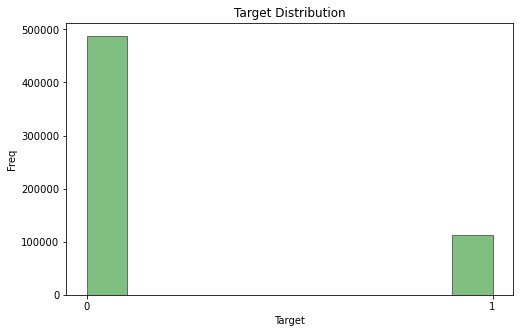

In [13]:
plt.figure(figsize=(8,5))
bin_ranges = [0, 1]
plt.hist(data.target.values,color='green', edgecolor='black',alpha=0.5)
plt.xlabel('Target')
plt.ylabel('Freq')
plt.title('Target Distribution')
plt.xticks(np.arange(0, 2, 1))
plt.show()

In [ ]:
### Based on the Above - the metric is AUC

In [15]:
data['ord_2'].value_counts(dropna=False)

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NaN             18075
Name: ord_2, dtype: int64

In [19]:
### Option 1 - label_Encoding
mapping = {    
    "Freezing" :0,
    "Warm" : 1,
    "Cold" :2,
    "Boiling Hot" : 3,
    "Hot" :4,
    "Lava Hot" :5
}
data1 = data.copy()
data1.loc[:,'ord_2'] = data1.ord_2.map(mapping)
data1['ord_2'].value_counts(dropna=False)

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
NaN     18075
Name: ord_2, dtype: int64

In [26]:
### Scikit learn Label Encoder
from sklearn import preprocessing as pp
data2 = data.copy()
data2.loc[:,'ord_2'] = data2.ord_2.fillna("None")
data2["ord_2"].value_counts(dropna=False)
lbl_encod = pp.LabelEncoder()
data2.loc[:,'ord_2'] = lbl_encod.fit_transform(data2.ord_2.values)
data2["ord_2"].value_counts()

2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: ord_2, dtype: int64

In [ ]:
### remember to fit & transform
###The fit method is calculating the mean and variance of each of the features present in our data. 
### The transform method is transforming all the features using the respective mean and variance.
### Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. 
### We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case.
### Using the transform method we can use the same mean and variance as it is calculated from our training data to 
### transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

### Why?

### If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature 
### and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model 
##  and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building 
### a model using machine learning algorithm.
### This is the standard procedure to scale our data while building a machine learning model so that our model is not biased towards a 
### particular feature of the dataset and at the same time prevents our model to learn the features/values/trends of our test data.

In [ ]:
### label encoding can be used directly in tree based models - DT, RF, Extra Tress, XGB, GBM, LiteGBM
###.for Linear mdoels , SVM & NN the data is expected to be normalized

In [27]:
### option 2 - Binarized Variables / Sparse Format
### e.g. Warm      --> 0 ---> 001
###      Hot       --> 1 ---> 100
###      lava hot  --> 2 ---> 101
import numpy as np
example = np.array([
     [0,0,1],
    [1,0,0],
    [1,0,1]    
])
print(example.nbytes)

72


In [32]:
### Sparse Format - based on the example above
###                  dictionary of key & values; keys are indices of rows and columns & value is 1;  
###                  store only with values 1 and ignore 0's
###                       F1. F2 F3
### Sample 0   Warm       0   0   1 
### Sample 1   Hot        1   0   0   
### Sample 2   Hot        1.  0.  1   

### Dict
### (0,2)  1
### (1,0)  1
### (2,0)  1
### (2,2)  1
from scipy import sparse
example = np.array([
     [0,0,1],
    [1,0,0],
    [1,0,1]    
])
sparse_eg = sparse.csr_matrix(example)
print(sparse_eg)
print(sparse_eg.data.nbytes)

  (0, 2)	1
  (1, 0)	1
  (2, 0)	1
  (2, 2)	1
32


In [33]:
### option 3 - One hot encoding
###.              Feature 1 - 6
### Freezing      000001
### Warm          000010
### Cold          ..... 
### Boiling Hot    
### Hot         
### Lava Hot      100000   
from scipy import sparse
example = np.array([
     [0,0,0,0,0,1],
     [0,1,0,0,0,0],
     [1,0,0,0,0,0],
])
sparse_eg = sparse.csr_matrix(example)
print(sparse_eg)
print(f"size of dense array:{example.nbytes}")
print(f"size of sparse array:{sparse_eg.data.nbytes}")

  (0, 5)	1
  (1, 1)	1
  (2, 0)	1
size of dense array:144
size of sparse array:24


In [ ]:
### The drawbacks of using binary encoding for categorical variables include:
### Complexity: Binary encoding can be complex to implement and understand, especially for non-technical individuals.
### Ordering of categories: Binary encoding assigns binary codes to categories in a specific order, 
###      which may not always reflect the true relationship between categories. 
###      For example, if the binary encoding assigns the code “00” to the category “A” and “01” to the category “B”, 
###       this may lead to the assumption that “A” is less than “B”.
### Information Loss: Binary encoding can result in information loss compared to one-hot encoding, as it reduces the number of columns 
###       representing the categorical feature. This may result in a loss of detail and decreased performance of machine learning models.
### Model limitations: Some machine learning models, such as decision trees, may not be able to handle binary encoded features effectively, 
###       as they may not be able to capture the underlying relationships between categories.
### Interpreting Results: Binary encoding can make it difficult to interpret the results of machine learning models, 
###      as the binary codes may not have a clear relationship to the original categories.


###  With binary encoding, you can reduce the dimensionality of the data by representing each category with a fixed number of bits. 
### This can help in terms of memory usage and computational time, especially when dealing with large datasets. 
### However, this reduction in dimensionality also means that some information about the relationships between categories may be lost.
### It’s important to carefully consider the trade-offs and limitations of each encoding method based on the characteristics of your data 
### and the requirements of your analysis.

### Label encoding assigns a unique integer to each category, preserving the ordinal relationships between categories but not 
###. the magnitude of those relationships. On the other hand, one-hot encoding creates a separate column for each category, 
###  capturing the magnitude of relationships but not the ordinal relationships.

### Label encoding is best when there is an ordinal relationship between categories, 
###.    as it captures the order of categories and can simplify the encoding process. 
### One-hot encoding is best when there is no ordinal relationship between categories, as it captures the magnitude of relationships 
###   and provides a high-dimensional representation of the data. “The magnitude of relationships” refers to the strength of the 
###   relationship between categories. For example, in a one-hot encoded representation, 
###   the presence or absence of a category in a particular row of data is used to indicate the relationship between that row and 
###   the corresponding category. The magnitude of the relationship is indicated by the presence or absence of a particular category in the data.
### Binary encoding is best when there are weak ordinal relationships between categories and the magnitude of relationships is not 
###   critical, or when memory constraints prevent the use of one-hot encoding.

In [41]:
### example of OneHotEncoding with Sklearn
import numpy as np
from sklearn import preprocessing
example = np.random.randint(1000,size=10)
one = preprocessing.OneHotEncoder(sparse=True)
one_example = one.fit_transform(example.reshape(-1,1))

In [46]:
print(one_example)

  (0, 4)	1.0
  (1, 7)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 9)	1.0
  (5, 2)	1.0
  (6, 8)	1.0
  (7, 5)	1.0
  (8, 3)	1.0
  (9, 6)	1.0


In [48]:
###. Option 4 - replace ord_2 with Count values - new feature with numerical data
data.groupby(['ord_2'])['id'].count()
    ###. sample -  data.groupby(['ord_2'])['id'].transform('count')

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

In [51]:
### Option 4 A - combine Ord_2 & other attributes together to form a new feature 
data.groupby(['ord_1','ord_2'])['id'].count()

ord_1        ord_2      
Contributor  Boiling Hot    15634
             Cold           17734
             Freezing       26082
             Hot            12428
             Lava Hot       11919
             Warm           22774
Expert       Boiling Hot    19477
             Cold           22956
             Freezing       33249
             Hot            15792
             Lava Hot       15078
             Warm           28900
Grandmaster  Boiling Hot    13623
             Cold           15464
             Freezing       22818
             Hot            10805
             Lava Hot       10363
             Warm           19899
Master       Boiling Hot    10800
             Cold           12364
             Freezing       18035
             Hot             8594
             Lava Hot        8209
             Warm           15734
Novice       Boiling Hot    22718
             Cold           26271
             Freezing       38233
             Hot            17850
             Lava Hot  

In [52]:
data['new_Feature'] = (data['ord_1'] + "_" + data['ord_2'])
data['new_Feature'].value_counts()

Novice_Freezing            38233
Novice_Warm                33263
Expert_Freezing            33249
Expert_Warm                28900
Novice_Cold                26271
Contributor_Freezing       26082
Expert_Cold                22956
Grandmaster_Freezing       22818
Contributor_Warm           22774
Novice_Boiling Hot         22718
Grandmaster_Warm           19899
Expert_Boiling Hot         19477
Master_Freezing            18035
Novice_Hot                 17850
Contributor_Cold           17734
Novice_Lava Hot            17373
Expert_Hot                 15792
Master_Warm                15734
Contributor_Boiling Hot    15634
Grandmaster_Cold           15464
Expert_Lava Hot            15078
Grandmaster_Boiling Hot    13623
Contributor_Hot            12428
Master_Cold                12364
Contributor_Lava Hot       11919
Grandmaster_Hot            10805
Master_Boiling Hot         10800
Grandmaster_Lava Hot       10363
Master_Hot                  8594
Master_Lava Hot             8209
Name: new_

In [ ]:
### Steps for categorial Variables
### - fill NAN values - treat them as a new category so that u treat them as new category
### - Convert them to integers by applying labelencoding using SKlearn or Mapping dictionary
### - Create OneHotEncoding,
### - Go for Modelling
### - in Prod ; we shd add something like a rare category which is not seen very often and classify incoming as rare. 
###.  this works for unknown categories too. u can also include a simple model which predict this unknow and include it in the model.
###.   but design ur cross validation dataset in a way it predicts like when u run it on test so that it will nnot overfit.